# 🚍 Student Transport Tracker


An interactive Data Analytics project with route tracking, dashboards, insights, and ethical awareness.

**Author**: Rupesh Varma

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
CSV_FILE = "student_transport_dataset.csv"

## 1. Initialization

In [3]:

def init_csv():
    try:
        with open(CSV_FILE, "x", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Student_ID", "Name", "Route", "Bus_No"])
    except FileExistsError:
        pass

## 2. Register Students

In [4]:
def register_student(student_id, name, route, bus_no):
    with open(CSV_FILE, "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([student_id, name, route, bus_no])
    print(f" Student {name} registered successfully!")

## 3. Count Students per Route

In [6]:

def count_students_per_route():
    df = pd.read_csv(CSV_FILE)
    route_counts = df.groupby("Route")["Student_ID"].count()
    print("\n Students per Route:")
    display(route_counts.to_frame())
    return route_counts

## 4. Route-wise Student List

In [8]:
def generate_route_list(route):
    df = pd.read_csv(CSV_FILE)
    route_students = df[df["Route"] == route]
    if route_students.empty:
        print(f" No students found in Route {route}")
    else:
        print(f"\n Students in Route {route}:")
        display(route_students)
    return route_students

## 5. Bus-wise Student List

In [9]:
def generate_bus_list(bus_no):
    df = pd.read_csv(CSV_FILE)
    bus_students = df[df["Bus_No"] == bus_no]
    if bus_students.empty:
        print(f" No students found in Bus {bus_no}")
    else:
        print(f"\n Students in Bus {bus_no}:")
        display(bus_students)
    return bus_students

## 6. Visualization (Dashboard Quality)

In [10]:
def visualize_distribution():
    df = pd.read_csv(CSV_FILE)
    plt.figure(figsize=(10,5))
    sns.countplot(x="Route", data=df, hue="Route", palette="Set2", legend=False)
    plt.title(" Students per Route")
    plt.xlabel("Route")
    plt.ylabel("Number of Students")
    plt.show()
    plt.figure(figsize=(10,5))
    sns.countplot(x="Bus_No", data=df, hue="Bus_No", palette="Set3", legend=False)
    plt.title(" Students per Bus")
    plt.xlabel("Bus Number")
    plt.ylabel("Number of Students")
    plt.show()


## 7. Machine Learning Model Example

In [11]:
def simple_ml_model():
    df = pd.read_csv(CSV_FILE)
    df["Bus_No_Encoded"] = df["Bus_No"].astype('category').cat.codes
    df["Route_Encoded"] = df["Route"].astype('category').cat.codes
    X = df[["Bus_No_Encoded"]]
    y = df["Route_Encoded"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n ML Model Accuracy (Predicting Route from Bus_No): {acc:.2f}")
    return acc

## 8. Ethical and Bias Awareness

In [12]:
def bias_check():
    df = pd.read_csv(CSV_FILE)
    route_counts = df["Route"].value_counts()
    print("\n Bias Check:")
    if route_counts.max() > 2 * route_counts.min():
        print(" Some routes are overloaded compared to others.")
    else:
        print(" Student distribution across routes looks balanced.")

## DEMO EXECUTION

In [13]:
init_csv()

In [14]:
# Register sample students
register_student("S101", "Arjun", "R2", "B12")
register_student("S102", "Lavanya", "R3", "B13")
register_student("S103", "Rupesh", "R2", "B12")
register_student("S104", "Preethi", "R3", "B13")
register_student("S105", "Kiran", "R4", "B14")

 Student Arjun registered successfully!
 Student Lavanya registered successfully!
 Student Rupesh registered successfully!
 Student Preethi registered successfully!
 Student Kiran registered successfully!


In [15]:
# Summary + Lists
count_students_per_route()
generate_route_list("R2")
generate_bus_list("B13")


 Students per Route:


,Student_ID
Route,
R1,202
R2,230
R3,219
R4,204
R5,190



 Students in Route R2:


,Student_ID,Name,Route,Bus_No
0,S0001,Ravi Singh,R2,B13
6,S0007,Priya Das,R2,B13
7,S0008,Divya Patel,R2,B13
17,S0018,Ravi Das,R2,B13
18,S0019,Divya Yadav,R2,B12
...,...,...,...,...
1032,S103,Rupesh,R2,B12
1035,S101,Arjun,R2,B12
1037,S103,Rupesh,R2,B12
1040,S101,Arjun,R2,B12



 Students in Bus B13:


,Student_ID,Name,Route,Bus_No
0,S0001,Ravi Singh,R2,B13
6,S0007,Priya Das,R2,B13
7,S0008,Divya Patel,R2,B13
17,S0018,Ravi Das,R2,B13
22,S0023,Ananya Nair,R2,B13
...,...,...,...,...
1033,S104,Preethi,R3,B13
1036,S102,Lavanya,R3,B13
1038,S104,Preethi,R3,B13
1041,S102,Lavanya,R3,B13


,Student_ID,Name,Route,Bus_No
0,S0001,Ravi Singh,R2,B13
6,S0007,Priya Das,R2,B13
7,S0008,Divya Patel,R2,B13
17,S0018,Ravi Das,R2,B13
22,S0023,Ananya Nair,R2,B13
...,...,...,...,...
1033,S104,Preethi,R3,B13
1036,S102,Lavanya,R3,B13
1038,S104,Preethi,R3,B13
1041,S102,Lavanya,R3,B13


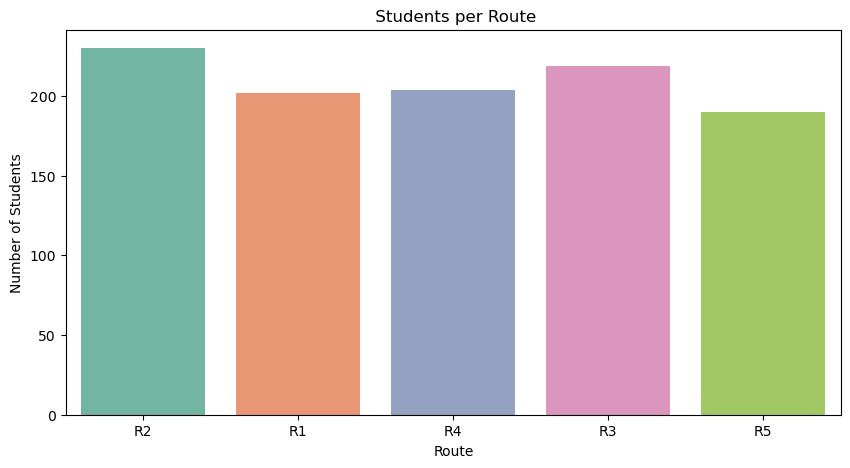

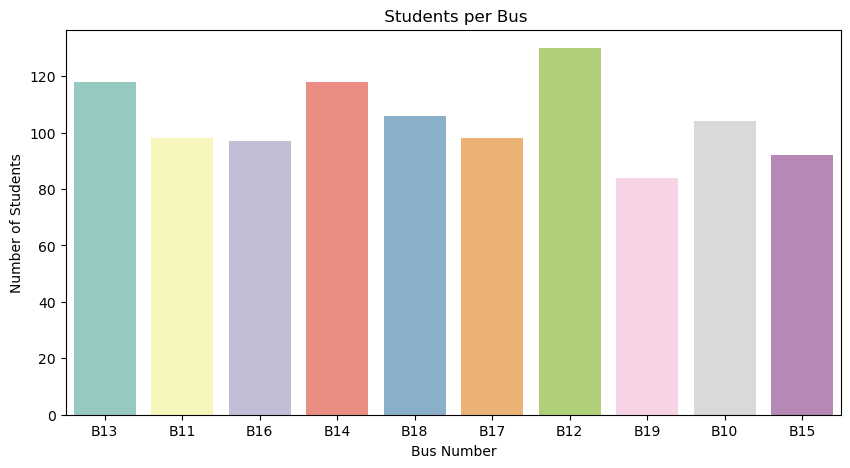

In [16]:
# Visualization 
visualize_distribution()

In [18]:
## ML Model Accuracy
simple_ml_model()


 ML Model Accuracy (Predicting Route from Bus_No): 0.98


0.9840764331210191

In [20]:
## bias_check()
bias_check()


 Bias Check:
 Student distribution across routes looks balanced.
